In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('FuelConsumptionCo2.csv')

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


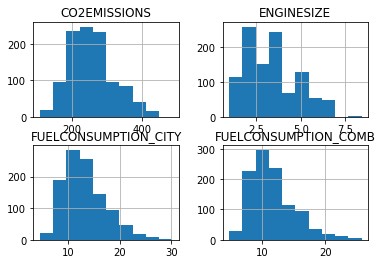

In [5]:
cdf=df[['ENGINESIZE','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.hist()
plt.show()

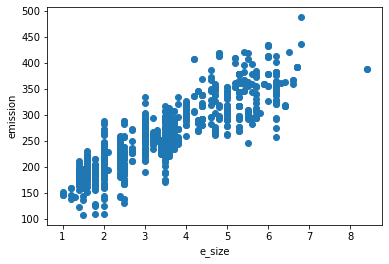

In [6]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS)
plt.xlabel('e_size')
plt.ylabel('emission')
plt.show()

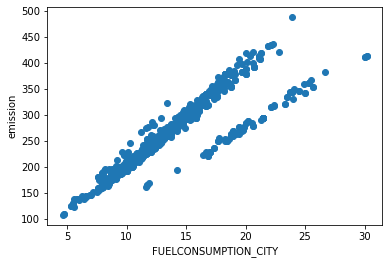

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_CITY,cdf.CO2EMISSIONS)
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('emission')
plt.show()

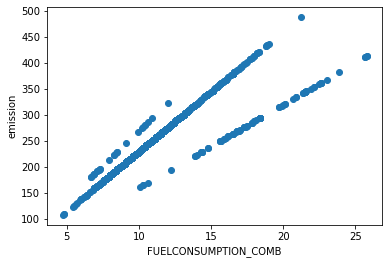

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS)
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('emission')
plt.show()

In [41]:
msk=np.random.rand(len(df))<.76
train=cdf[msk]
test=cdf[~msk]

In [11]:
train_x

567     5.0
264     5.3
931     1.3
377     3.7
247     1.4
       ... 
1021    2.0
789     1.6
256     1.4
968     2.5
952     2.0
Name: ENGINESIZE, Length: 800, dtype: float64

In [42]:
from sklearn.linear_model import LinearRegression

In [13]:
lrg=LinearRegression()

In [44]:
train_x=np.asanyarray(train[['ENGINESIZE']])

In [45]:
train_x

array([[2. ],
       [2.4],
       [1.5],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [3.7],
       [2.4],
       [3.5],
       [5.9],
       [4.7],
       [4.7],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [4. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [5.2],
       [4.2],
       [4.2],
       [4.2],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [3. ],
       [4. ],
       [3. ],
       [2. ],
       [4. ],
       [6. ],
       [6. ],
       [6.8],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [2. ],
       [3. ],
       [3. ],
       [3. ],
       [2. ],
       [2. ],
       [3. ],
       [3. ],
       [4.4],
       [4.4],
       [4.4],
       [4.4],
       [4.4],
       [3. ],
       [4.4],
       [4.4],
       [6. ],
      

In [46]:
test_x=np.asanyarray(test[['CO2EMISSIONS']])

In [49]:
train_y=np.asanyarray(train[['CO2EMISSIONS']])

In [47]:
test_x

array([[232],
       [225],
       [359],
       [338],
       [354],
       [359],
       [202],
       [230],
       [230],
       [224],
       [227],
       [288],
       [361],
       [242],
       [239],
       [258],
       [212],
       [336],
       [407],
       [354],
       [354],
       [409],
       [306],
       [290],
       [281],
       [281],
       [209],
       [209],
       [237],
       [320],
       [380],
       [322],
       [380],
       [200],
       [209],
       [221],
       [237],
       [193],
       [200],
       [230],
       [232],
       [232],
       [212],
       [292],
       [338],
       [209],
       [253],
       [255],
       [209],
       [260],
       [232],
       [260],
       [255],
       [340],
       [382],
       [340],
       [354],
       [271],
       [290],
       [179],
       [177],
       [209],
       [272],
       [334],
       [344],
       [380],
       [414],
       [419],
       [413],
       [221],
       [244],
      

In [50]:
lrg.fit(train_x,train_y)

LinearRegression()

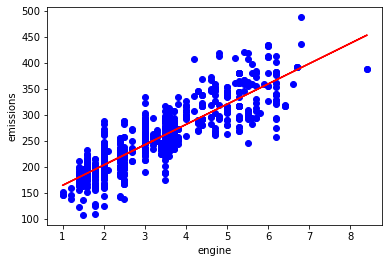

In [55]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel('engine')
plt.ylabel('emissions')
plt.plot(train_x,lrg.intercept_[0]+lrg.coef_[0][0]*train_x,'-r')

In [57]:
test_y=np.asanyarray(test[['CO2EMISSIONS']])

In [58]:
test_x=np.asanyarray(test[['ENGINESIZE']])

In [60]:
PRED_Y=lrg.predict(test_x)

In [61]:
PRED_Y

array([[262.33815252],
       [219.42043113],
       [355.97681737],
       [309.15748495],
       [309.15748495],
       [355.97681737],
       [203.81398698],
       [203.81398698],
       [203.81398698],
       [242.83009734],
       [242.83009734],
       [281.8462077 ],
       [371.58326152],
       [203.81398698],
       [203.81398698],
       [242.83009734],
       [203.81398698],
       [289.64942977],
       [289.64942977],
       [328.66554012],
       [328.66554012],
       [328.66554012],
       [289.64942977],
       [281.8462077 ],
       [281.8462077 ],
       [281.8462077 ],
       [203.81398698],
       [203.81398698],
       [203.81398698],
       [281.8462077 ],
       [359.87842841],
       [281.8462077 ],
       [359.87842841],
       [203.81398698],
       [203.81398698],
       [242.83009734],
       [242.83009734],
       [203.81398698],
       [203.81398698],
       [242.83009734],
       [242.83009734],
       [242.83009734],
       [242.83009734],
       [297

In [62]:
from sklearn.metrics import r2_score
print(r2_score(test_y,PRED_Y))

0.7796080791233017
